In [1]:
#import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import hist
import vector
vector.register_awkward()
import numba
import awkward as ak
from math import floor
import os
#import mplhep as hep
#plt.style.use(hep.style.CMS)

In [2]:
folder = "/eos/user/d/dvalsecc/EFT_PhD_Course/samples/ntuples/SSWW_2018/minimal"
outfolder = "/eos/user/d/dvalsecc/EFT_PhD_Course/training_datasets"
os.makedirs(outfolder, exist_ok=True)

In [11]:
ak.to_parquet.dataset(folder)

In [3]:
df = ak.from_parquet(folder)
df

<Array [{weight: 1.84e+04, ...}, ..., {...}] type='486353 * {weight: float6...'>

In [4]:
df.fields

['weight',
 'VBSJets_pt',
 'VBSJets_eta',
 'VBSJets_phi',
 'VBSJets_mass',
 'nonVBSJets_pt',
 'nonVBSJets_eta',
 'nonVBSJets_phi',
 'nonVBSJets_mass',
 'LeptonGood_pt',
 'LeptonGood_eta',
 'LeptonGood_phi',
 'LeptonGood_mass',
 'LeptonGood_charge',
 'PuppiMET_phi',
 'PuppiMET_pt',
 'W1_pt',
 'W1_eta',
 'W1_phi',
 'W1_mass',
 'W1_charge',
 'W2_pt',
 'W2_eta',
 'W2_phi',
 'W2_mass',
 'W2_charge',
 'VBSPartons_pt',
 'VBSPartons_eta',
 'VBSPartons_phi',
 'VBSPartons_mass',
 'VBSPartons_pdgId',
 'Neutrino1_pt',
 'Neutrino1_eta',
 'Neutrino1_phi',
 'Neutrino2_pt',
 'Neutrino2_eta',
 'Neutrino2_phi',
 'Generator_x1',
 'Generator_x2',
 'Generator_id1',
 'Generator_id2',
 'Generator_xpdf1',
 'Generator_xpdf2']

In [5]:
N_events = len(df)
N_training = floor(N_events * 0.7)
N_validation = N_events - N_training
print(f"N_events: {N_events}, N training {N_training}, N validation {N_validation}")

N_events: 486353, N training 340447, N validation 145906


## Some kinematic variables

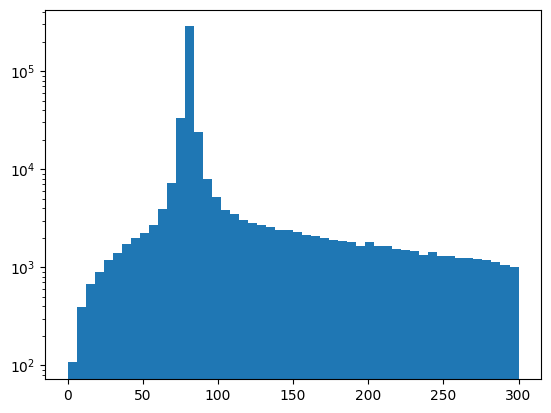

In [6]:
plt.hist(df.W1_mass, bins=50, range=(0,300))
plt.yscale("log")

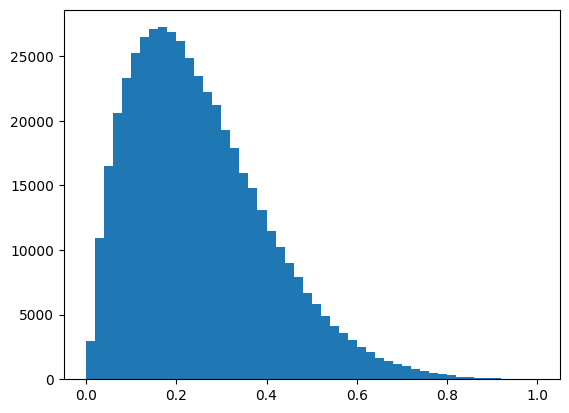

In [7]:
plt.hist(df.Generator_x1, bins=50, range=(0,1));

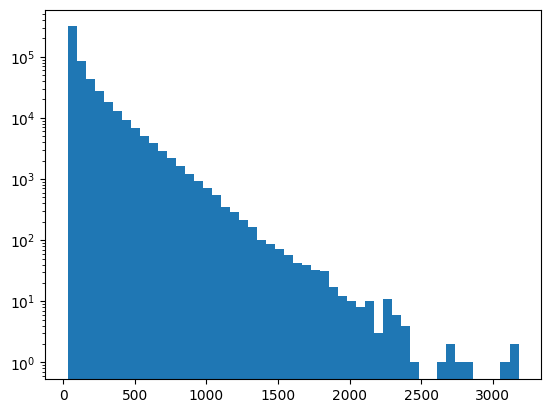

In [8]:
plt.hist(ak.flatten(df.nonVBSJets_pt), bins=50);
plt.yscale("log")

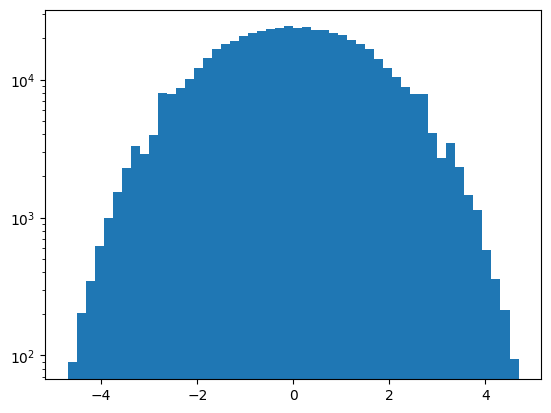

In [9]:
plt.hist(ak.flatten(df.nonVBSJets_eta), bins=50);
plt.yscale("log")

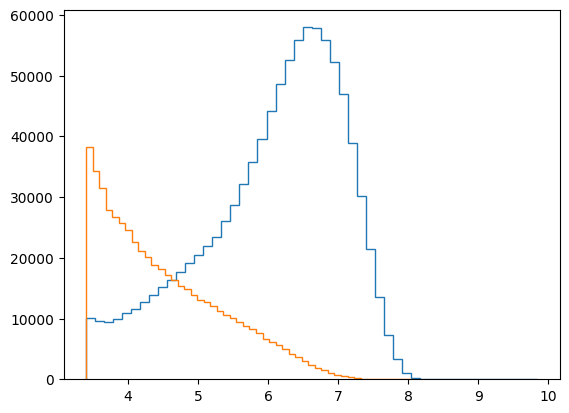

In [10]:
plt.hist(np.log(ak.flatten(df.VBSJets_pt)), bins=50, histtype="step");
plt.hist(np.log(ak.flatten(df.nonVBSJets_pt)), bins=50, histtype="step");


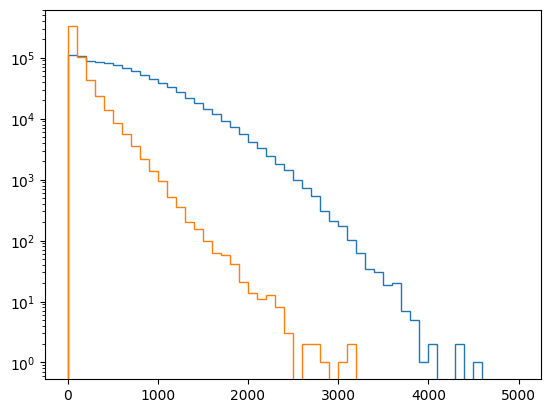

In [11]:
plt.hist(ak.flatten(df.VBSJets_pt), bins=50, range=(0,5000),histtype="step");
plt.hist(ak.flatten(df.nonVBSJets_pt), bins=50, range=(0,5000),histtype="step");

plt.yscale("log")

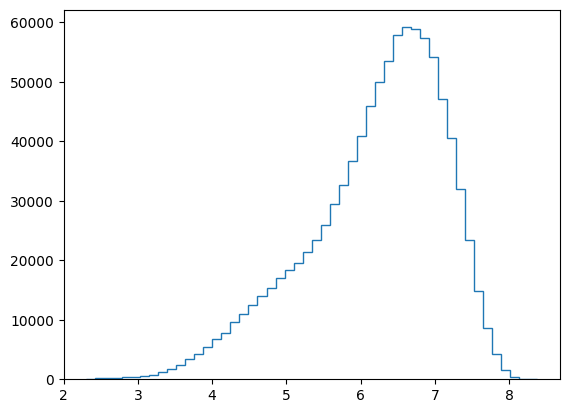

In [12]:
plt.hist(np.log(ak.flatten(df.VBSPartons_pt)), bins=50, histtype="step");


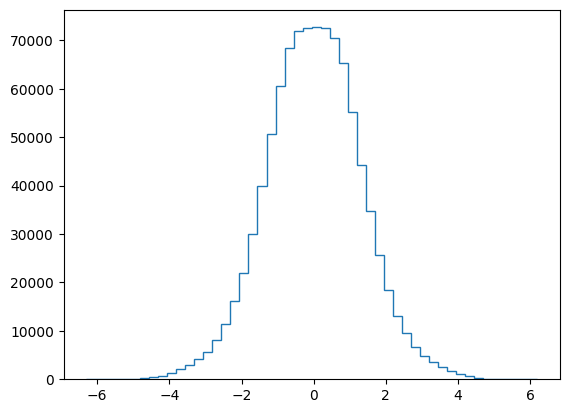

In [13]:
plt.hist(ak.flatten(df.VBSPartons_eta), bins=50, histtype="step");


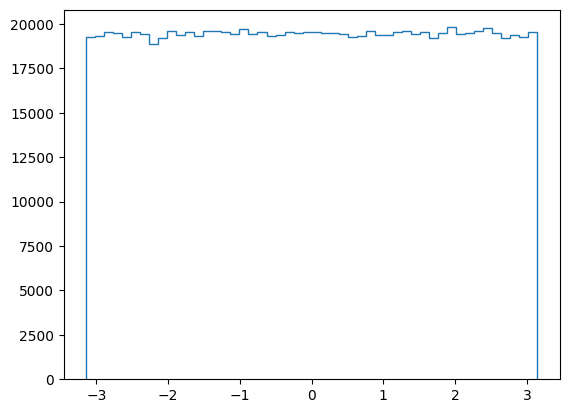

In [14]:
plt.hist(ak.flatten(df.VBSPartons_phi), bins=50, histtype="step");


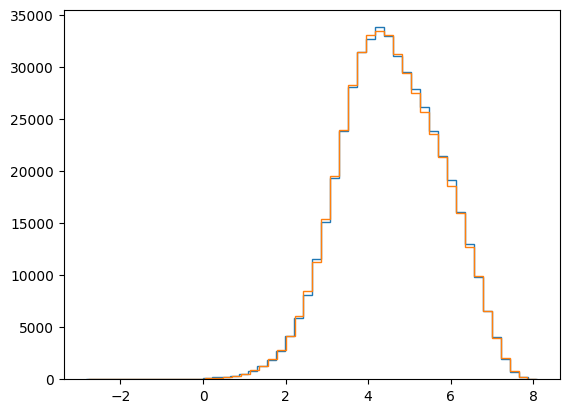

In [15]:
plt.hist(np.log(df.Neutrino1_pt), bins=50, histtype="step");
plt.hist(np.log(df.Neutrino2_pt), bins=50, histtype="step");


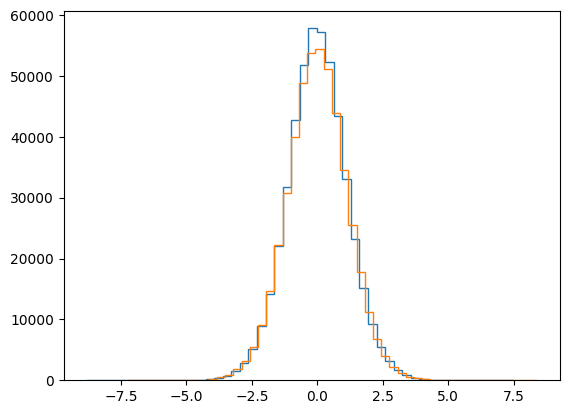

In [16]:
plt.hist(df.Neutrino1_eta, bins=50, histtype="step");
plt.hist(df.Neutrino2_eta, bins=50, histtype="step");


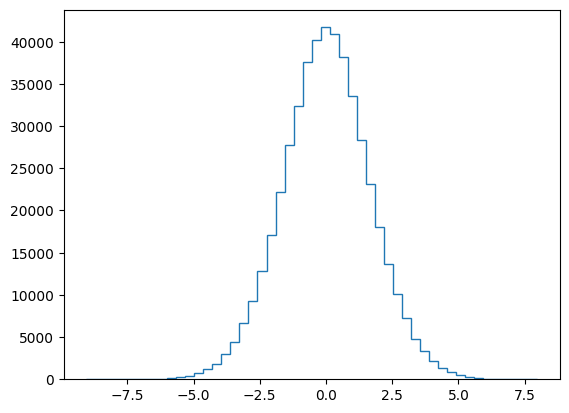

In [17]:
plt.hist(df.Neutrino1_eta-df.Neutrino2_eta, bins=50, histtype="step");


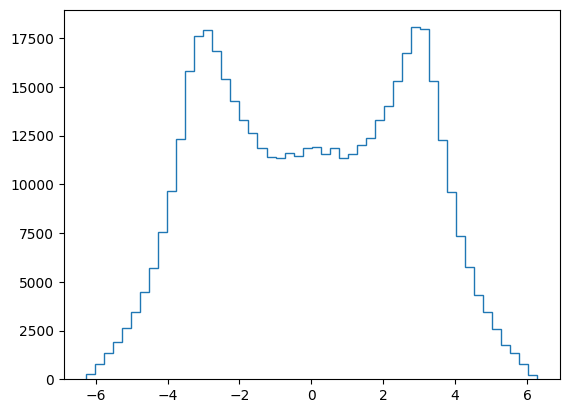

In [18]:
plt.hist(df.Neutrino1_phi-df.Neutrino2_phi, bins=50, histtype="step");


# Data augmentation

In [6]:
VBSJets = ak.zip({"pt": df.VBSJets_pt, 
            "eta": df.VBSJets_eta, 
            "phi": df.VBSJets_phi, 
            "m": df.VBSJets_mass},
             with_name='Momentum4D')

nonVBSJets = ak.zip({"pt": df.nonVBSJets_pt, 
            "eta": df.nonVBSJets_eta, 
            "phi": df.nonVBSJets_phi, 
            "m": df.nonVBSJets_mass},
             with_name='Momentum4D')

Leptons = ak.zip({"pt": df.LeptonGood_pt, 
            "eta": df.LeptonGood_eta, 
            "phi": df.LeptonGood_phi, 
            "m": ak.zeros_like(df.LeptonGood_pt)},
             with_name='Momentum4D')

MET = ak.zip({"pt": df.PuppiMET_pt, 
            "eta": ak.zeros_like(df.PuppiMET_pt), 
            "phi": df.PuppiMET_phi, 
            "m": ak.zeros_like(df.PuppiMET_pt)},
             with_name='Momentum4D')

Neutrino1 = ak.zip({"pt": df.Neutrino1_pt, 
            "eta": df.Neutrino1_eta, 
            "phi": df.Neutrino1_phi, 
            "m": ak.zeros_like(df.Neutrino1_pt)},
             with_name='Momentum4D')

Neutrino2 = ak.zip({"pt": df.Neutrino2_pt, 
            "eta": df.Neutrino2_eta, 
            "phi": df.Neutrino2_phi, 
            "m": ak.zeros_like(df.Neutrino2_pt)},
             with_name='Momentum4D')

W1 = ak.zip({"pt": df.W1_pt, 
            "eta": df.W1_eta,
            "phi": df.W1_phi, 
            "m": df.W1_mass},
             with_name='Momentum4D')


W2 = ak.zip({"pt": df.W2_pt, 
            "eta": df.W2_eta,
            "phi": df.W2_phi, 
            "m": df.W2_mass},
             with_name='Momentum4D')

We can increase the limited statistics of our training dataset by performing random phi rotations for the full event. 

In [7]:
Naugment = 10
np.random.seed(42)
phi_rotation = np.random.uniform(-np.pi, np.pi, size=(Naugment, len(VBSJets)))

VBSJets_aug = [VBSJets]
nonVBSJets_aug = [nonVBSJets]
Leptons_aug = [Leptons]
MET_aug = [MET]
W1_aug = [W1]
W2_aug = [W2]
Neutrino1_aug = [Neutrino1]
Neutrino2_aug = [Neutrino2]

def rotate(vec, phi):
    vecr = vec.rotate_axis(axis=vector.obj(x=0. , y=0., z=10.), angle=phi)
    return ak.zip({"pt": vecr.pt, "eta":vecr.eta, "phi":vecr.phi, "m": vecr.m}, with_name="Momentum4D")

for i in range(Naugment):
    VBSJets_aug.append(rotate(VBSJets, phi_rotation[i]))
    nonVBSJets_aug.append(rotate(nonVBSJets, phi_rotation[i]))
    Leptons_aug.append(rotate(Leptons, phi_rotation[i]))
    MET_aug.append(rotate(MET, phi_rotation[i]))
    W1_aug.append(rotate(W1, phi_rotation[i]))
    W2_aug.append(rotate(W2, phi_rotation[i]))
    Neutrino1_aug.append(rotate(Neutrino1, phi_rotation[i]))
    Neutrino2_aug.append(rotate(Neutrino2, phi_rotation[i]))

VBSJets = ak.concatenate(VBSJets_aug)
nonVBSJets = ak.concatenate(nonVBSJets_aug)
Leptons = ak.concatenate(Leptons_aug)
MET = ak.concatenate(MET_aug)
W1 = ak.concatenate(W1_aug)
W2 = ak.concatenate(W2_aug)
Neutrino1 = ak.concatenate(Neutrino1_aug)
Neutrino2 = ak.concatenate(Neutrino2_aug)


In [8]:
N_events *= Naugment+1
N_training *= Naugment+1
N_validation *= Naugment+1
print(f"N events {N_events}, N training {N_training}, N val {N_validation}")

N events 5349883, N training 3744917, N val 1604966


# Data standardization and input preparation

We will use as inputs the reconstructed leptons, the MET and the jets. 

We want to standardize the input so that they have a mean ~0 and variance 1. 

Moreover it is useful to convert phi in $cos(\phi), sin(\phi)$, or using the *logit* function to make it gaussian-like.

We also rescale the $p_T$ as $log(1 + p_T - p_T^{min})$.

We will save different tensors for Leptons, MET and jets as we will apply different embedding layers to the different objects.

## Leptons

In [9]:
lep_pt = Leptons.pt.to_numpy()
lep_pt_scaled = np.log(1 + lep_pt - 15.)

Text(0.5, 0, 'leptons pt scaled')

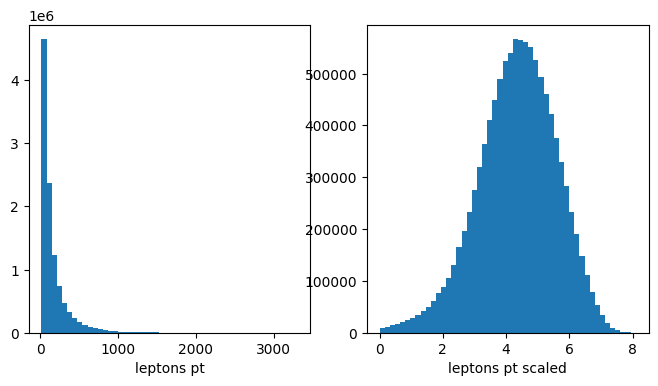

In [10]:
f, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].hist(lep_pt.flatten(), bins=50);
axs[0].set_xlabel("leptons pt")
axs[1].hist(lep_pt_scaled.flatten(), bins=50);
axs[1].set_xlabel("leptons pt scaled")

In [11]:
def logistic(x):
    return 1/(1+np.exp(-x))

def logit(x, clip=1e-6):
    x = np.clip(x, a_min=clip, a_max=1-clip)
    return np.log(x/(1-x))

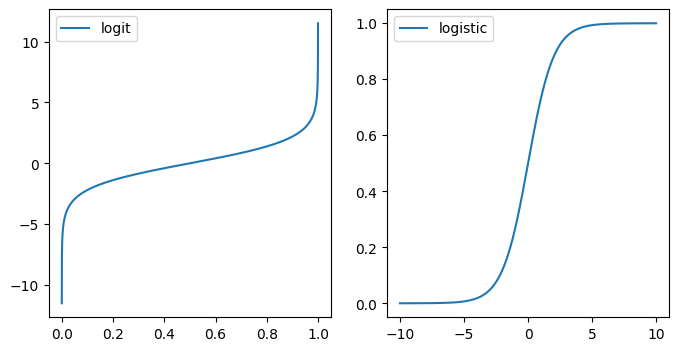

In [12]:
f, axs = plt.subplots(1, 2, figsize=(8,4))
x = np.linspace(1e-5, 1-1e-5, 10000)
axs[0].plot(x, logit(x), label="logit")
axs[0].legend()

x = np.linspace(-10, 10, 10000)
axs[1].plot(x, logistic(x), label="logistic")
axs[1].legend()

In [13]:
PI= 3.1416015625
lep_eta = Leptons.eta.to_numpy()
lep_phi = Leptons.phi.to_numpy()
lep_phi_scaled = logit( (lep_phi + PI )/(2*PI), clip=1e-6)

Text(0.5, 0, 'leptons phi scaled')

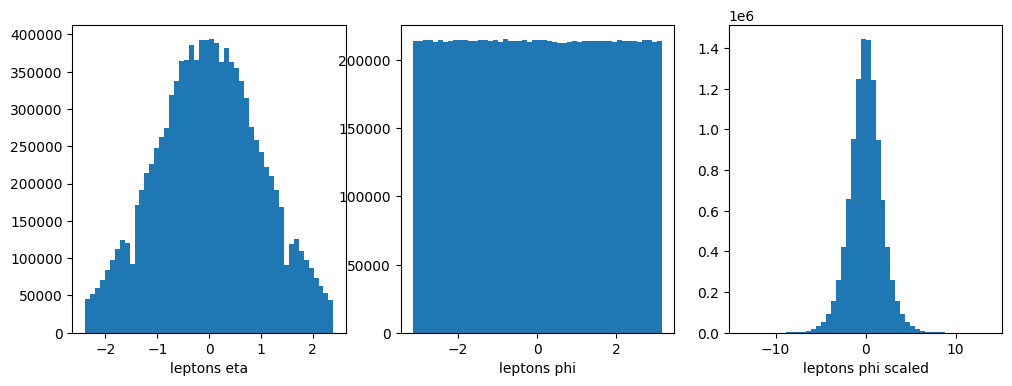

In [14]:
f, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].hist(lep_eta.flatten(), bins=50);
axs[0].set_xlabel("leptons eta")
axs[1].hist(lep_phi.flatten(), bins=50);
axs[1].set_xlabel("leptons phi")
axs[2].hist(lep_phi_scaled.flatten(), bins=50);
axs[2].set_xlabel("leptons phi scaled")

### Final lepton tensor

In [15]:
lep_inputs = np.stack([lep_pt_scaled, lep_eta, lep_phi_scaled], axis=2)
lep_inputs_orig = np.stack([lep_pt, lep_eta, lep_phi], axis=2)

In [16]:
lep_mean = np.mean(lep_inputs, axis=(0,1))
lep_std = np.std(lep_inputs, axis=(0,1))
lep_scaling = np.stack([lep_mean, lep_std], axis=1)
lep_scaling

array([[ 4.34189848e+00,  1.23271931e+00],
       [-2.16936466e-03,  1.00505770e+00],
       [-1.24228209e-03,  1.81327078e+00]])

In [17]:
lep_inputs_norm = (lep_inputs - lep_mean) /lep_std

In [18]:
np.save(f"{outfolder}/lepton_data_training.npy", lep_inputs_norm[:N_training]) 
np.save(f"{outfolder}/lepton_data_validation.npy", lep_inputs_norm[N_training:])
np.save(f"{outfolder}/lepton_data_original_training.npy", lep_inputs_orig[:N_training]) 
np.save(f"{outfolder}/lepton_data_original_validation.npy", lep_inputs_orig[N_training:])
np.save(f"{outfolder}/lepton_data_scaling.npy", lep_scaling)


Text(0.5, 0, 'leptons phi normalized')

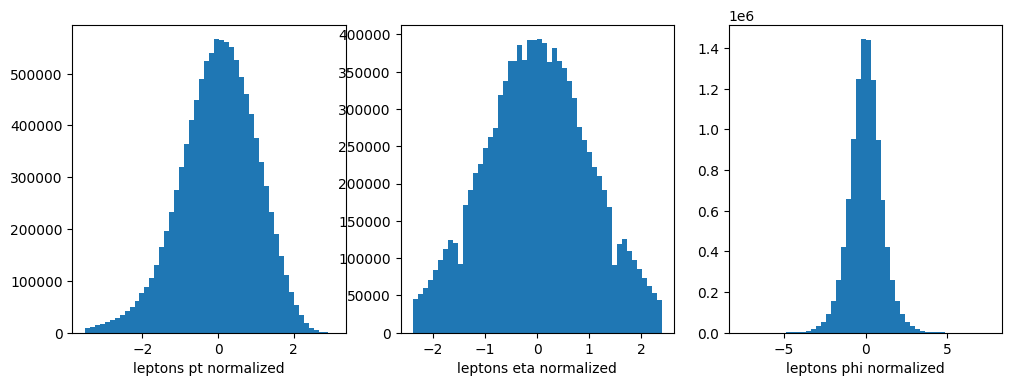

In [19]:
f, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].hist(lep_inputs_norm[:,:,0].flatten(), bins=50);
axs[0].set_xlabel("leptons pt normalized")
axs[1].hist(lep_inputs_norm[:,:,1].flatten(), bins=50);
axs[1].set_xlabel("leptons eta normalized")
axs[2].hist(lep_inputs_norm[:,:,2].flatten(), bins=50);
axs[2].set_xlabel("leptons phi normalized")

## MET

(5349883, 1, 2)


Text(0.5, 0, 'met phi normalized')

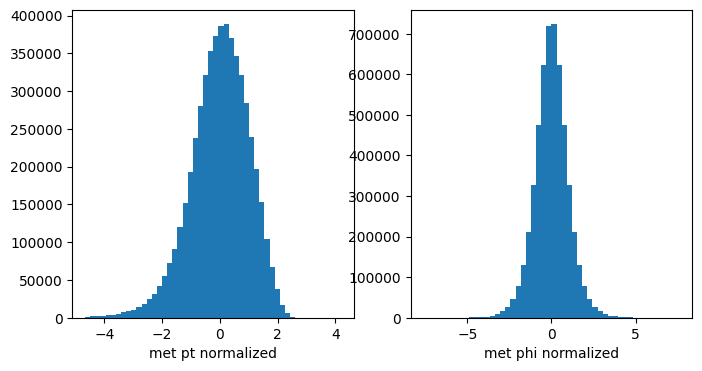

In [20]:
met_pt = MET.pt.to_numpy()
met_pt_scaled = np.log(1 + met_pt - 15.)

met_phi = MET.phi.to_numpy()
met_phi_scaled = logit( (met_phi + PI )/(2*PI), clip=1e-6)

met_inputs = np.stack([np.expand_dims(met_pt_scaled, 1),np.expand_dims(met_phi_scaled, 1)], axis=2)
met_inputs_orig = np.stack([np.expand_dims(met_pt, 1),np.expand_dims(met_phi, 1)], axis=2)

print(met_inputs.shape)

met_mean = np.mean(met_inputs, axis=(0,1))
met_std = np.std(met_inputs, axis=(0,1))
met_scaling = np.stack([met_mean, met_std], axis=1)

met_inputs_norm = (met_inputs - met_mean) /met_std

np.save(f"{outfolder}/met_data_training.npy", met_inputs_norm[:N_training]) 
np.save(f"{outfolder}/met_data_validation.npy", met_inputs_norm[N_training:])
np.save(f"{outfolder}/met_data_original_training.npy", met_inputs_orig[:N_training]) 
np.save(f"{outfolder}/met_data_original_validation.npy", met_inputs_orig[N_training:])
np.save(f"{outfolder}/met_data_scaling.npy", met_scaling)


f, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].hist(met_inputs_norm[:,:,0].flatten(), bins=50);
axs[0].set_xlabel("met pt normalized")
axs[1].hist(met_inputs_norm[:,:,1].flatten(), bins=50);
axs[1].set_xlabel("met phi normalized")

# Jets

We will take VBSjets and nonVBS jets and scale them together. 

The number of non VBS jets is not constant along events --> we need to pad them to maximum dimension. 
We will store an array of 0 and a mask to be passed to our ML models to ignore those inputs


We will add a label to the VBSJets to distinguish them from the others

11


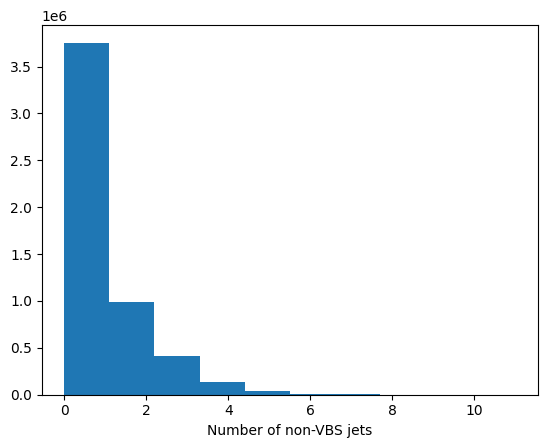

In [21]:
plt.hist(ak.num(nonVBSJets.pt));
plt.xlabel("Number of non-VBS jets")
print(ak.max(ak.num(nonVBSJets.pt)))

In [22]:
jet_pt = np.concatenate([VBSJets.pt.to_numpy(), 
                         ak.fill_none(ak.pad_none(nonVBSJets.pt, 11), 0.).to_numpy()],
                         axis=1)
jet_eta = np.concatenate([VBSJets.eta.to_numpy(), 
                         ak.fill_none(ak.pad_none(nonVBSJets.eta, 11), 0.).to_numpy()],
                         axis=1)
jet_phi = np.concatenate([VBSJets.phi.to_numpy(), 
                         ak.fill_none(ak.pad_none(nonVBSJets.phi, 11), 0.).to_numpy()],
                         axis=1)
jet_mass = np.concatenate([VBSJets.mass.to_numpy(), 
                         ak.fill_none(ak.pad_none(nonVBSJets.mass, 11), 0.).to_numpy()],
                         axis=1)
mask_pad = jet_pt > 0.
print(mask_pad)

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True False ... False False False]
 [ True  True  True ... False False False]]


In [23]:
jet_pt_scaled = np.where(mask_pad, np.log(1 + jet_pt - 30.), np.zeros((N_events,1))) 
jet_mass_scaled = np.where(mask_pad, np.log(1 + jet_mass), np.zeros((N_events,1))) 
jet_phi_scaled = np.where(mask_pad, logit( (jet_phi + PI )/(2*PI), clip=1e-6), np.zeros((N_events,1)))  

/tmp/ipykernel_988395/3470620449.py:1: RuntimeWarning: invalid value encountered in log
  jet_pt_scaled = np.where(mask_pad, np.log(1 + jet_pt - 30.), np.zeros((N_events,1)))


### VBS Jets label

In [24]:
vbsjets_label = np.zeros((N_events, 13, 1), dtype=bool)
vbsjets_label[:, 0:2] = 1
vbsjets_label.shape

(5349883, 13, 1)

In [25]:
jet_inputs = np.stack([jet_pt_scaled, jet_eta, jet_phi_scaled, jet_mass_scaled], axis=2)
jet_inputs_orig = np.stack([jet_pt, jet_eta, jet_phi, jet_mass], axis=2)

jet_inputs.shape

(5349883, 13, 4)

In [26]:
jet_inputs[0:2]

array([[[ 6.58892648, -0.86938477,  0.31661463,  4.50189084],
        [ 6.52135723,  0.83349609,  5.26770195,  3.94763143],
        [ 3.60583746, -1.69946289,  0.18634714,  2.33713747],
        [ 3.34880699, -0.18234253,  0.455329  ,  2.40919483],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[ 6.03607934,  1.7902832 ,  0.11305545,  4.26355977],
        [ 3.59731226, -2.65625   ,  0.09902785,  2.48360372],
        [ 6.20657593,  0.09283447, -1.6008829 ,  4.10882258],
      

### Scaling with padding
The padding should be taken into account when computing the scaling to avoid biasing the mean and std toward 0.

In [39]:
jet_mean = np.mean(jet_inputs[mask_pad], axis=(0))
jet_std = np.std(jet_inputs[mask_pad], axis=(0))
jet_scaling = np.stack([jet_mean, jet_std], axis=1)

jet_inputs_norm = np.where(mask_pad[:,:,None], (jet_inputs - jet_mean)/jet_std, np.zeros(jet_inputs.shape))

# concatenating the VBS jets label
jet_inputs_norm = np.concatenate([jet_inputs_norm, vbsjets_label], axis=2)
jet_inputs_orig = np.concatenate([jet_inputs_orig, vbsjets_label], axis=2)

In [27]:
np.save(f"{outfolder}/jet_data_training.npy", jet_inputs_norm[:N_training]) 
np.save(f"{outfolder}/jet_data_validation.npy", jet_inputs_norm[N_training:])
np.save(f"{outfolder}/jet_data_original_training.npy", jet_inputs_orig[:N_training]) 
np.save(f"{outfolder}/jet_data_original_validation.npy", jet_inputs_orig[N_training:])
np.save(f"{outfolder}/jet_padding_mask_training.npy", mask_pad[:N_training])
np.save(f"{outfolder}/jet_padding_mask_validation.npy", mask_pad[N_training:])
np.save(f"{outfolder}/jet_data_scaling.npy", jet_scaling)


f, axs = plt.subplots(1, 4, figsize=(16,4))
axs[0].hist(jet_inputs_norm[mask_pad][:,0].flatten(), bins=50);
axs[0].set_xlabel("jets pt normalized")
axs[1].hist(jet_inputs_norm[mask_pad][:,1].flatten(), bins=50);
axs[1].set_xlabel("jets eta normalized")
axs[2].hist(jet_inputs_norm[mask_pad][:,2].flatten(), bins=50);
axs[2].set_xlabel("jets phi normalized")
axs[3].hist(jet_inputs_norm[mask_pad][:,3].flatten(), bins=50);
axs[3].set_xlabel("jets mass normalized")

NameError: name 'jet_inputs_norm' is not defined

In [ ]:
# We need to save also a fake padding mask for leptons and met
mask_pad_all = np.concatenate([mask_pad, np.ones((mask_pad.shape[0],3))], axis=1)
print(mask_pad_all[0])
np.save(f"{outfolder}/jetlepmet_padding_mask_training.npy", mask_pad_all[:N_training])
np.save(f"{outfolder}/jetlepmet_padding_mask_validation.npy", mask_pad_all[N_training:])

# Target variables

## W bosons

We want to build a regression of the two W boson quadrimomenta. We have to save the quadrimomenta as target variables, properly scaled,

In [ ]:
W_pt = np.stack([W1.pt.to_numpy(),W2.pt.to_numpy()], axis=1)
W_eta = np.stack([W1.eta.to_numpy(),W2.eta.to_numpy()], axis=1)
W_phi = np.stack([W1.phi.to_numpy(),W2.phi.to_numpy()], axis=1)
W_mass = np.stack([W1.mass.to_numpy(),W2.mass.to_numpy()], axis=1)

W_pt_scaled = np.log(1 + W_pt)
W_phi_scaled = logit( (W_phi + PI )/(2*PI), clip=1e-6)
W_mass_scaled = np.log(1+W_mass)

W_inputs = np.stack([W_pt_scaled, W_eta, W_phi_scaled, W_mass_scaled], axis=2)
W_inputs_orig = np.stack([W_pt, W_eta, W_phi, W_mass], axis=2)

W_mean = np.mean(W_inputs, axis=(0,1))
W_std = np.std(W_inputs, axis=(0,1))
W_scaling = np.stack([W_mean, W_std], axis=1)
W_inputs_norm = (W_inputs - W_mean)/W_std

np.save(f"{outfolder}/W_data_training.npy", W_inputs_norm[:N_training]) 
np.save(f"{outfolder}/W_data_validation.npy", W_inputs_norm[N_training:])
np.save(f"{outfolder}/W_data_original_training.npy", W_inputs_orig[:N_training]) 
np.save(f"{outfolder}/W_data_original_validation.npy", W_inputs_orig[N_training:])
np.save(f"{outfolder}/W_data_scaling.npy", W_scaling)


f, axs = plt.subplots(1, 4, figsize=(16,4))
axs[0].hist(W_inputs_norm[:,:,0].flatten(), bins=50);
axs[0].set_xlabel("W pt normalized")
axs[1].hist(W_inputs_norm[:,:,1].flatten(), bins=50);
axs[1].set_xlabel("W eta normalized")
axs[2].hist(W_inputs_norm[:,:,2].flatten(), bins=50);
axs[2].set_xlabel("W phi normalized")
axs[3].hist(W_inputs_norm[:,:,3].flatten(), bins=50);
axs[3].set_xlabel("W mass normalized")

## Neutrino
We save also the neutrino quadrimomenta for further validation and for the generative model task

In [ ]:
nu_pt = np.stack([Neutrino1.pt.to_numpy(),Neutrino2.pt.to_numpy()], axis=1)
nu_eta = np.stack([Neutrino1.eta.to_numpy(),Neutrino2.eta.to_numpy()], axis=1)
nu_phi = np.stack([Neutrino1.phi.to_numpy(),Neutrino2.phi.to_numpy()], axis=1)

nu_pt_scaled = np.log(1 + nu_pt)
nu_phi_scaled = logit( (nu_phi + PI )/(2*PI), clip=1e-6)

nu_inputs = np.stack([nu_pt_scaled, nu_eta, nu_phi_scaled], axis=2)
nu_inputs_orig = np.stack([nu_pt, nu_eta, nu_phi], axis=2)

nu_mean = np.mean(nu_inputs, axis=(0,1))
nu_std = np.std(nu_inputs, axis=(0,1))
nu_scaling = np.stack([nu_mean, nu_std], axis=1)
nu_inputs_norm = (nu_inputs - nu_mean)/nu_std

np.save(f"{outfolder}/nu_data_training.npy", nu_inputs_norm[:N_training]) 
np.save(f"{outfolder}/nu_data_validation.npy", nu_inputs_norm[N_training:])
np.save(f"{outfolder}/nu_data_original_training.npy", nu_inputs_orig[:N_training]) 
np.save(f"{outfolder}/nu_data_original_validation.npy", nu_inputs_orig[N_training:])
np.save(f"{outfolder}/nu_data_scaling.npy", nu_scaling)


f, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].hist(nu_inputs_norm[:,:,0].flatten(), bins=50);
axs[0].set_xlabel("nu pt normalized")
axs[1].hist(nu_inputs_norm[:,:,1].flatten(), bins=50);
axs[1].set_xlabel("nu eta normalized")
axs[2].hist(nu_inputs_norm[:,:,2].flatten(), bins=50);
axs[2].set_xlabel("nu phi normalized")

## Generator info - pdf

In [28]:
x1 = df.Generator_x1.to_numpy()
x2 = df.Generator_x2.to_numpy()
x1x2 = np.stack([x1,x2], axis=1)
E_cm = 6500*(x1+x2)
pz = 6500*(x1-x2)

E_cm_scaled = np.log(1+E_cm)
#pz_scaled = np.log(1+pz)
Ecm_pz_orig = np.stack([E_cm, pz], axis=1)
Ecm_pz_scaled = np.stack([E_cm_scaled, pz], axis=1)

Ecm_pz_mean = np.mean(Ecm_pz_scaled, axis=0)
Ecm_pz_std = np.std(Ecm_pz_scaled, axis=0)
Ecm_pz_scaling = np.stack([Ecm_pz_mean, Ecm_pz_std], axis=1)
Ecm_pz_norm = (Ecm_pz_scaled - Ecm_pz_mean)/Ecm_pz_std


In [29]:
# duplicate 10 more times to have the same dimensionality as above
x1x2 = np.vstack([x1x2]*11)
Ecm_pz_norm = np.vstack([Ecm_pz_norm]*11)
Ecm_pz_orig = np.vstack([Ecm_pz_orig]*11)

In [30]:
np.save(f"{outfolder}/x1x2_data_training.npy", x1x2[:N_training]) 
np.save(f"{outfolder}/x1x2_data_validation.npy", x1x2[N_training:])
np.save(f"{outfolder}/EcmPz_data_training.npy", Ecm_pz_norm[:N_training]) 
np.save(f"{outfolder}/EcmPz_data_validation.npy", Ecm_pz_norm[N_training:])
np.save(f"{outfolder}/EcmPz_data_original_training.npy", Ecm_pz_orig[:N_training]) 
np.save(f"{outfolder}/EcmPz_data_original_validation.npy", Ecm_pz_orig[N_training:])
np.save(f"{outfolder}/EcmPz_data_scaling.npy", Ecm_pz_scaling)

Text(0.5, 0, '$p_Z$ of the event')

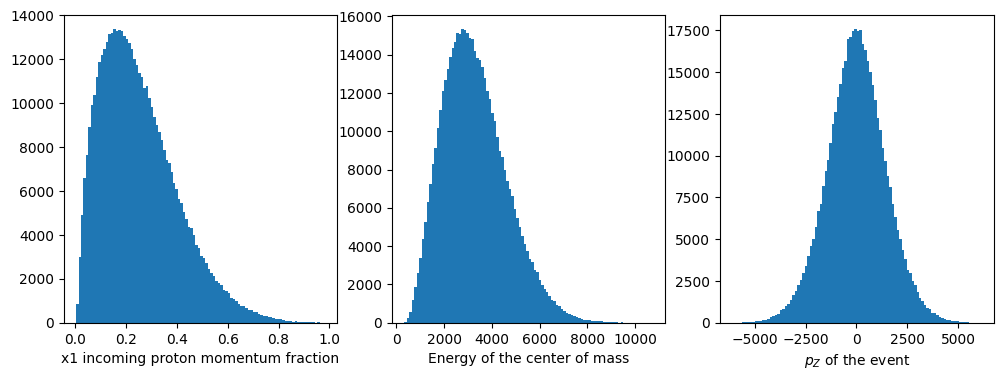

In [31]:
f, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].hist(x1, bins=100)
axs[0].set_xlabel("x1 incoming proton momentum fraction")

axs[1].hist(E_cm, bins=100)
axs[1].set_xlabel("Energy of the center of mass")

axs[2].hist(pz, bins=100)
axs[2].set_xlabel("$p_Z$ of the event")

## Total reco momenta

In [32]:
tot_px = (ak.sum(Leptons.px, axis=1) + MET.px + ak.sum(VBSJets.px, axis=1) + ak.sum(nonVBSJets.px, axis=1)).to_numpy()
tot_py = (ak.sum(Leptons.py, axis=1) + MET.py + ak.sum(VBSJets.py, axis=1) + ak.sum(nonVBSJets.py, axis=1)).to_numpy()
tot_pz = (ak.sum(Leptons.pz, axis=1) + MET.pz + ak.sum(VBSJets.pz, axis=1) + ak.sum(nonVBSJets.pz, axis=1)).to_numpy()
tot_E = (ak.sum(Leptons.E, axis=1) + MET.E + ak.sum(VBSJets.E, axis=1) + ak.sum(nonVBSJets.E, axis=1)).to_numpy()

In [33]:
tot_E_scaled = np.log(1+tot_E)
#pz_scaled = np.log(1+pz)
Ecm_pz_reco_orig = np.stack([tot_E, tot_pz], axis=1)
Ecm_pz_reco_scaled = np.stack([tot_E_scaled, tot_pz], axis=1)

Ecm_pz_reco_mean = np.mean(Ecm_pz_reco_scaled, axis=0)
Ecm_pz_reco_std = np.std(Ecm_pz_reco_scaled, axis=0)
Ecm_pz_reco_scaling = np.stack([Ecm_pz_reco_mean, Ecm_pz_reco_std], axis=1)
Ecm_pz_reco_norm = (Ecm_pz_reco_scaled - Ecm_pz_reco_mean)/Ecm_pz_reco_std

In [34]:
np.save(f"{outfolder}/EcmPz_reco_data_training.npy", Ecm_pz_reco_norm[:N_training]) 
np.save(f"{outfolder}/EcmPz_reco_data_validation.npy", Ecm_pz_reco_norm[N_training:])
np.save(f"{outfolder}/EcmPz_reco_data_original_training.npy", Ecm_pz_reco_orig[:N_training]) 
np.save(f"{outfolder}/EcmPz_reco_data_original_validation.npy", Ecm_pz_reco_orig[N_training:])
np.save(f"{outfolder}/EcmPz_reco_data_scaling.npy", Ecm_pz_reco_scaling)

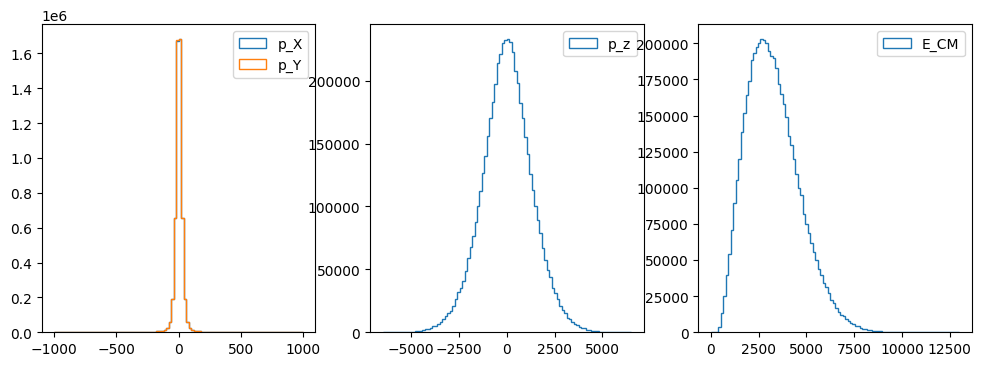

In [35]:
f, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].hist(tot_px, label="p_X", bins=100, range=(-1000, 1000), histtype="step");
axs[0].hist(tot_py, label="p_Y", bins=100, range=(-1000, 1000), histtype="step");
axs[0].legend()

axs[1].hist(tot_pz, label="p_z", bins=100, range=(-6500, 6500), histtype="step");
axs[1].legend()

axs[2].hist(tot_E, label="E_CM", bins=100, range=(0, 13000), histtype="step");
axs[2].legend()